<a href="https://colab.research.google.com/github/DiyaSaha/Coding-Homeworks-Projects/blob/main/Marketing_Analytics/Market_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np
import warnings


Data set used from Kaggle, hosted on GitHub

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DiyaSaha/Coding-Homeworks-Projects/main/Marketing_Analysis/marketing_data.csv', header = 0)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


EXPLORATORY ANALAYSIS 

Section 1) Imorting data and manupulating variables

In [ ]:
print(df.info())
print(df.columns.values) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Straight away, it can be seen that the column name 'Income' has some whitespace which will create issues when referencing this 
column futher down in the project. Therefore, all names will be checked for whitespace for thoroughness.

In [ ]:
df.columns = df.columns.str.strip(' ')
print(df.columns.values)

['ID' 'Year_Birth' 'Education' 'Marital_Status' 'Income' 'Kidhome'
 'Teenhome' 'Dt_Customer' 'Recency' 'MntWines' 'MntFruits'
 'MntMeatProducts' 'MntFishProducts' 'MntSweetProducts' 'MntGoldProds'
 'NumDealsPurchases' 'NumWebPurchases' 'NumCatalogPurchases'
 'NumStorePurchases' 'NumWebVisitsMonth' 'AcceptedCmp3' 'AcceptedCmp4'
 'AcceptedCmp5' 'AcceptedCmp1' 'AcceptedCmp2' 'Response' 'Complain'
 'Country']


Next thing that can be noticed is that the all columns have 2240 elements except the Income column. This will be investigated further below:

In [ ]:
count_nan_in_df = df.isnull().sum()
print(count_nan_in_df)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


This shows that 24 null values in the Income value would bring it to the total number of elements present in every column (2240). To deal with the missing values present in this column, the first step taken is to change it from the format of string to float

In [ ]:
df.loc[df['Income'].isnull(),'value_is_nan'] = 1
df.loc[df['Income'].notnull(), 'value_is_nan'] = 0

#need income in float to actually use for analysis
df['Income'] = df['Income'].str.replace('$','').str.replace(',','').astype(float)

Next, we are going to visualize the distribution of the income to get a better idea of the spread 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

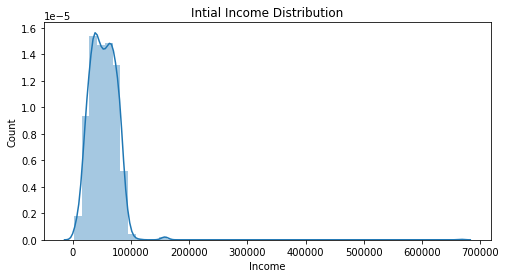

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], hist=True)
plt.title('Intial Income Distribution')
plt.ylabel('Count')

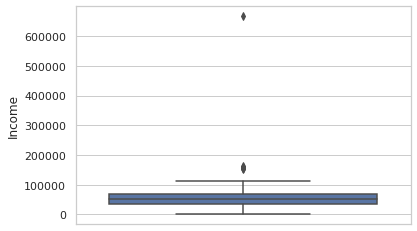

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(y=df["Income"])

The box plot and distribution shows that there is one high value (above 600k which seems unlikely) present which can skew the average - hence, cannot use this method to fill the missing values. While median of the distribution can be used, I want to make sure I dont lose the relationship between Birth, Education etc and Income value when prediciting the missing values. Hence, I will be using K-nearest neighbors here. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

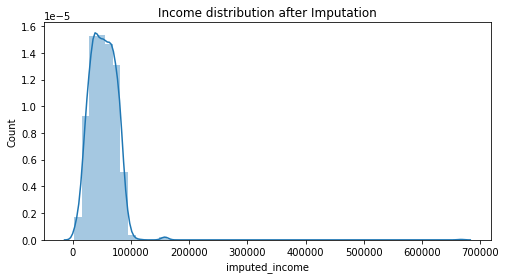

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df['imputed_income'] = imputer.fit_transform(df[['Income']])
plt.figure(figsize=(8,4))
sns.distplot(df['imputed_income'], hist=True)
plt.title('Income distribution after Imputation')
plt.ylabel('Count')

In [ ]:
#check for dupicate records
for i in df.duplicated():
    if i == True:
        ans = 0
    else:
        ans = 1
if ans == 1:
    print('Good to go!, No duplicates')
else:
    print('There are duplicates')

Good to go!, No duplicates


In [ ]:
# Change the Dt_Customer field data type to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

DEALING WITH CATEGORICAL DATA (Feature Engineering)

In [ ]:
categorical_variables = ['Education','Marital_Status','Country']
for i in categorical_variables:
    print('{} Unique Values: {}'.format(i,df[i].unique()))
 

Education Unique Values: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Marital_Status Unique Values: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Country Unique Values: ['SP' 'CA' 'US' 'AUS' 'GER' 'IND' 'SA' 'ME']


"Education" and "Marital_Status" have values than be joined into one category for simpler data handling. For example, 2n Cycle and Master are equal. So there can be 4 categories now: Basic = High School (HS), Graduation = Bachelors, Masters, PhD. Same case for Martial_Status values; Single, Widow, YOLO, Alone and Absurd can be joined together as 1 category: Single. While Married and Together can be put together as a Couple. (There is no description that explains if Together means as a married couple or as in a relationship)

In [ ]:
#2nd cycle = graduate/masters level so that can be combined
#Basic = High School (HS)
df['Education'] = df['Education'].replace(['2n Cycle'], value='Master')
df['Education'] = df['Education'].replace(['Graduation'], value='Bachelor')
df['Education'] = df['Education'].replace(['Basic'], value='HS')

#We can create 2 Marital Status column, 1 which is an overview where 0 = Single or 1 = Not Single/Couple     
#The other one could be seperated into 4 categories: Single, Married, Divorced, Widow (#Assuming absurd is single)
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], value='Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Together','Married'], value='Couple')
df['Relationship_Status'] = df['Marital_Status'].replace(['Couple'], value=1)
df['Relationship_Status'] = df['Relationship_Status'].replace(['Single','Widow','Divorced'], value=0)


In [ ]:
print(df['Relationship_Status'].value_counts())

1    1444
0     796
Name: Relationship_Status, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


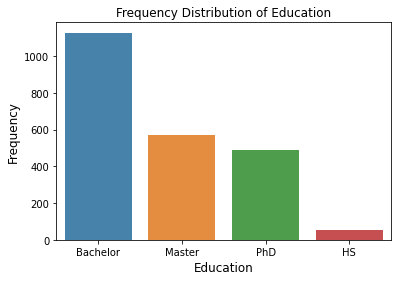

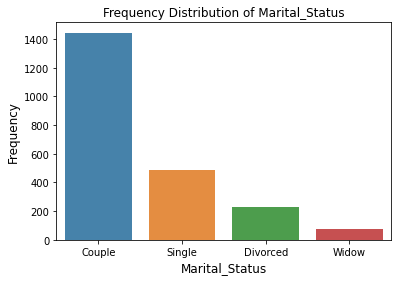

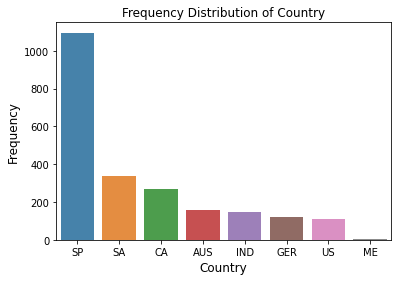

In [ ]:
for i in range(len(categorical_variables)):
  plt.figure(i+1)
  val = df[categorical_variables[i]].value_counts()
  sns.barplot(val.index, val.values, alpha=0.9)
  plt.title('Frequency Distribution of {}'.format(categorical_variables[i]))
  plt.ylabel('Frequency', fontsize=12)
  plt.xlabel('{}'.format(categorical_variables[i]), fontsize=12)

In [ ]:
df['Children'] = np.where(df.Kidhome+df.Teenhome > 0, 1, 0) #FOR MORE UPPER LEVEL ANALYSIS


In [1]:
''' IN PROGRESS
#TOTAL CAMPAIGNS (CMP) ACCEPTED BY CUSTOMERS 
df['Total_Cmp_Accepted'] = np.zeros(2240)
for j in df.loc['Total_Cmp_Accepted']:
  for i in range(len(df)):
      j = df['AcceptedCmp1'][i] + df['AcceptedCmp2'][i] + df['AcceptedCmp3'][i] + df['AcceptedCmp4'][i] + df['AcceptedCmp5'][i]
'''

"\n#TOTAL CAMPAIGNS (CMP) ACCEPTED BY CUSTOMERS \ndf['Total_Cmp_Accepted'] = np.zeros(2240)\nfor j in df.loc['Total_Cmp_Accepted']:\n  for i in range(len(df)):\n      j = df['AcceptedCmp1'][i] + df['AcceptedCmp2'][i] + df['AcceptedCmp3'][i] + df['AcceptedCmp4'][i] + df['AcceptedCmp5'][i]\n"